In [1]:
# Exploratory Data Analysis - Customer Churn
# This notebook explores the synthetic churn dataset and identifies key patterns

# Step 1: Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src.config import RAW_DATA_FILE, TARGET_COLUMN
from src.preprocessing import load_data

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Setup complete")



✅ Setup complete


In [2]:
# Step 2: Load Data
df = load_data()

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()



✅ Loaded data: (200000, 11)
Dataset shape: (200000, 11)

First few rows:


,CustomerID,Gender,Age,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,SupportTickets,UsageScore,Churn
0,CUST_000001,Male,56,29,Month-to-month,Bank transfer,83.59,2424.11,2,48.82,0
1,CUST_000002,Male,70,24,Month-to-month,Electronic check,57.93,1390.32,2,59.13,1
2,CUST_000003,Male,50,17,One year,Electronic check,70.56,1199.52,1,48.31,1
3,CUST_000004,Male,32,3,Month-to-month,Mailed check,80.43,241.29,1,63.32,1
4,CUST_000005,Male,31,14,One year,Credit card,89.48,1252.72,2,37.37,0


In [3]:
# Step 3: Basic Statistics
print("="*70)
print("DATASET OVERVIEW")
print("="*70)

print(f"\nTotal customers: {len(df):,}")
print(f"Total features: {df.shape[1]}")

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()



DATASET OVERVIEW

Total customers: 200,000
Total features: 11

Data types:
CustomerID         object
Gender             object
Age                 int64
Tenure              int64
Contract           object
PaymentMethod      object
MonthlyCharges    float64
TotalCharges      float64
SupportTickets      int64
UsageScore        float64
Churn               int64
dtype: object

Missing values:
CustomerID        0
Gender            0
Age               0
Tenure            0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
SupportTickets    0
UsageScore        0
Churn             0
dtype: int64

Basic statistics:


,Age,Tenure,MonthlyCharges,TotalCharges,SupportTickets,UsageScore,Churn
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,48.437980,24.026520,70.114075,1684.851553,2.00023,56.645213,0.435015
std,17.895484,14.548576,24.477844,1227.757385,1.41157,15.481522,0.495760
min,18.000000,1.000000,20.000000,20.000000,0.00000,0.000000,0.000000
25%,33.000000,13.000000,53.040000,756.270000,1.00000,46.160000,0.000000
50%,48.000000,23.000000,69.980000,1435.320000,2.00000,56.630000,0.000000
75%,64.000000,33.000000,86.800000,2321.410000,3.00000,67.070000,1.000000
max,79.000000,71.000000,150.000000,10350.000000,12.00000,100.000000,1.000000



Churn Distribution:
Churn
0    112997
1     87003
Name: count, dtype: int64

Churn Rate: 43.50%
Class Imbalance Ratio: 1.30:1


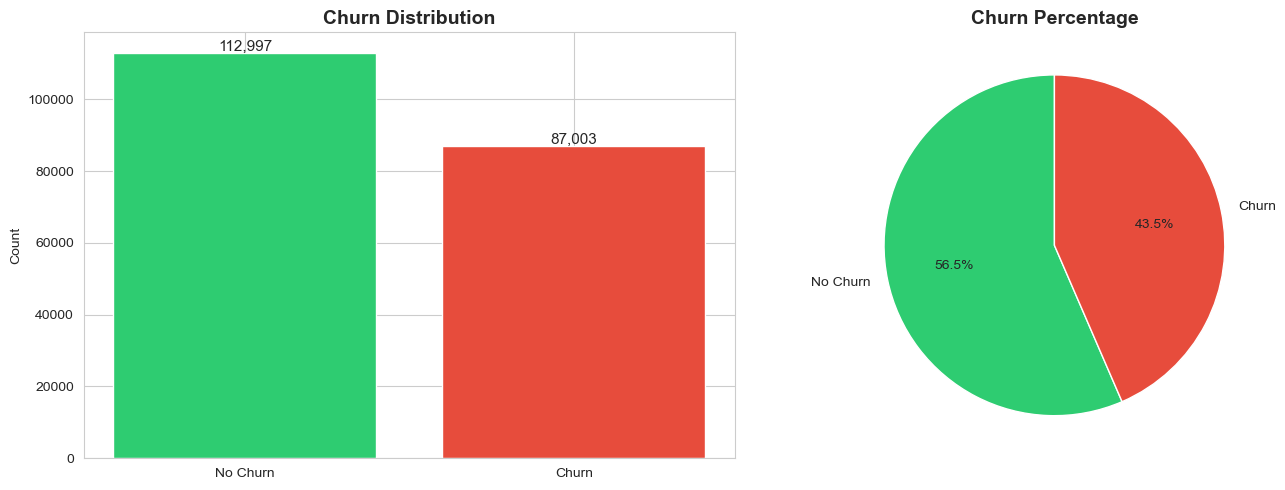

In [4]:
# Step 4: Target Variable Distribution
churn_counts = df[TARGET_COLUMN].value_counts()
churn_rate = df[TARGET_COLUMN].mean()

print(f"\nChurn Distribution:")
print(churn_counts)
print(f"\nChurn Rate: {churn_rate:.2%}")
print(f"Class Imbalance Ratio: {churn_counts[0] / churn_counts[1]:.2f}:1")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['No Churn', 'Churn'], churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=11)

# Pie chart
axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


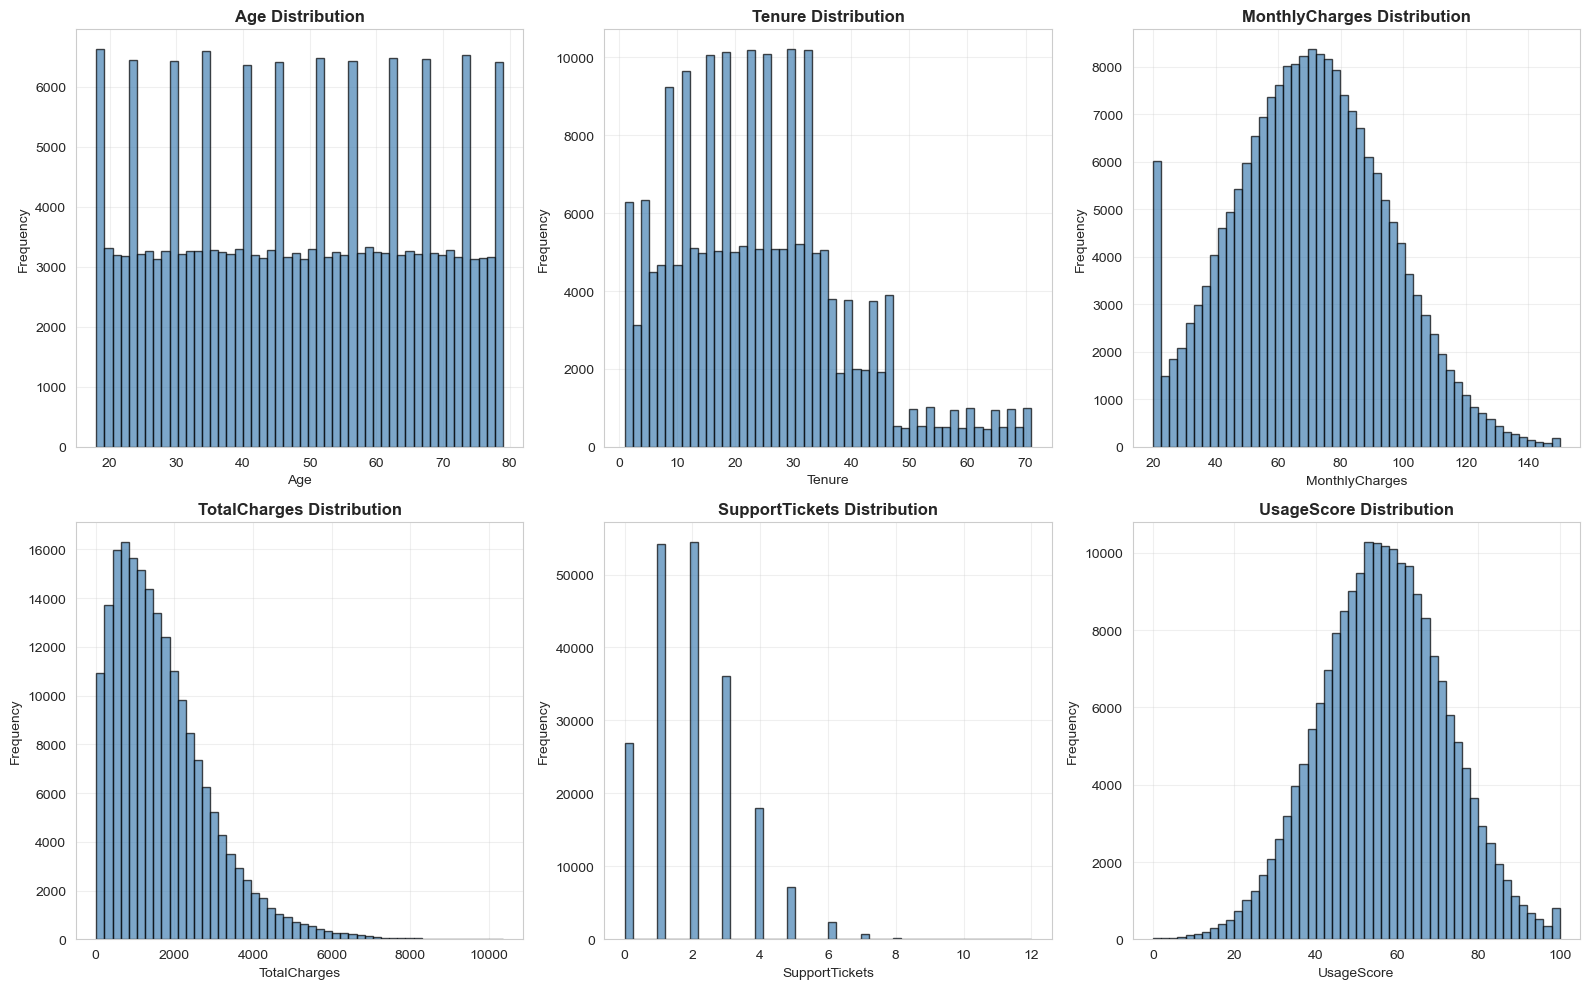

In [5]:
# Step 5: Numerical Features Distribution
numerical_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'SupportTickets', 'UsageScore']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


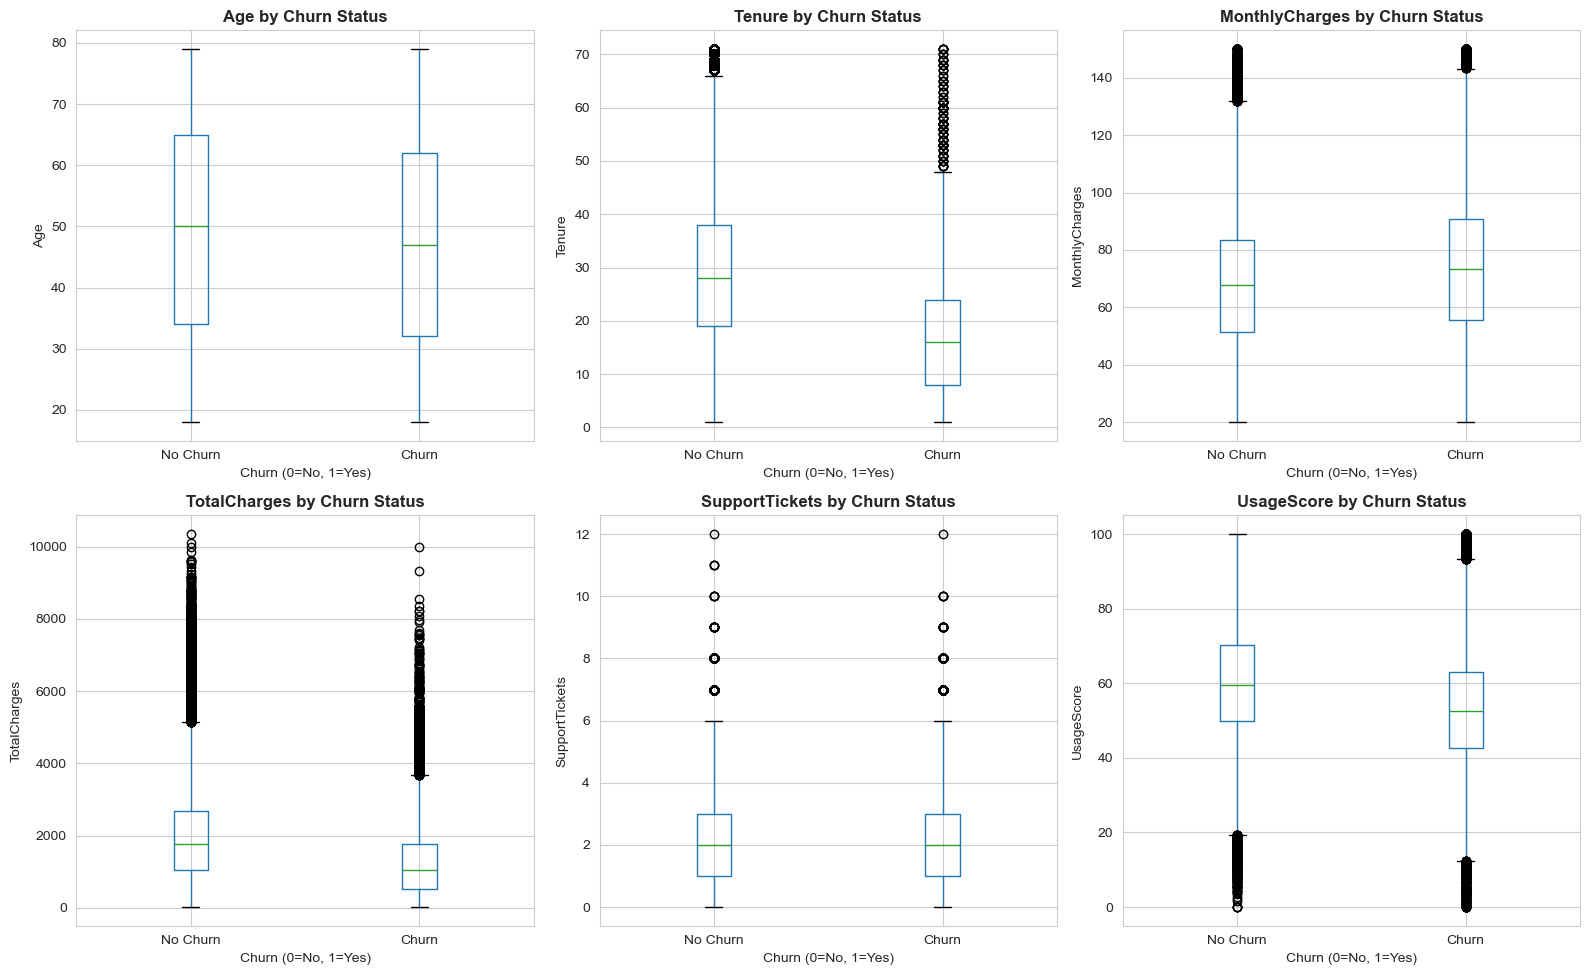

In [6]:
# Step 6: Numerical Features vs Churn
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by=TARGET_COLUMN, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn (0=No, 1=Yes)')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No Churn', 'Churn'])

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()


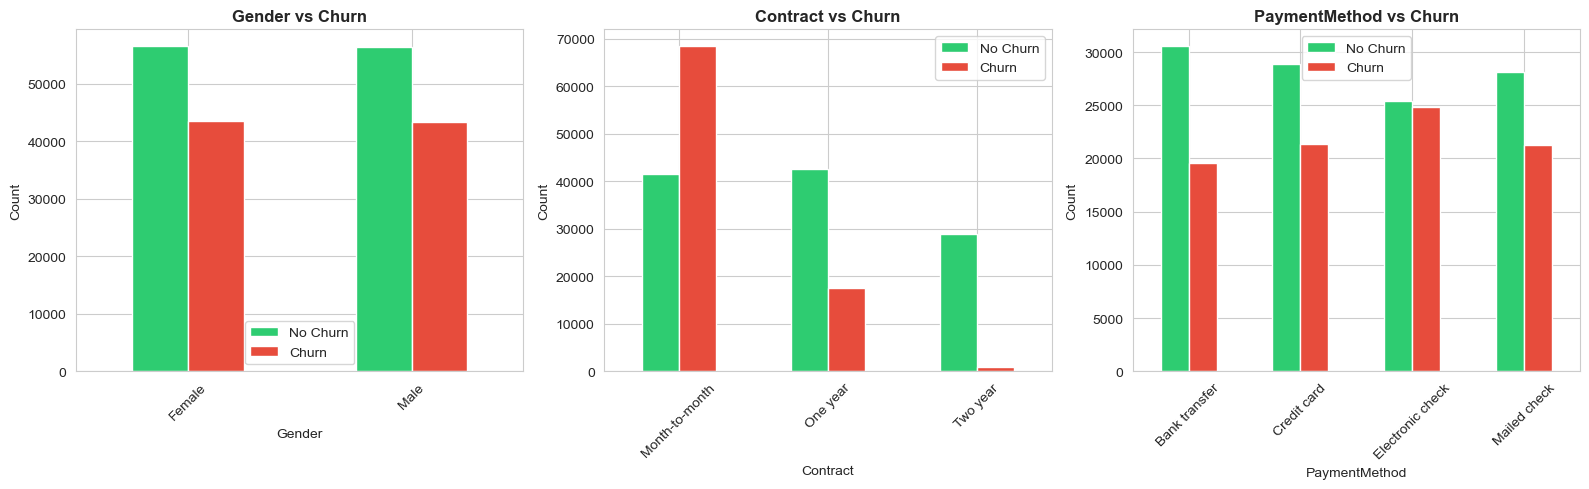

In [7]:
# Step 7: Categorical Features vs Churn
categorical_cols = ['Gender', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(categorical_cols):
    churn_by_cat = df.groupby([col, TARGET_COLUMN]).size().unstack()
    churn_by_cat.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(['No Churn', 'Churn'])
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [8]:
# Step 8: Churn Rate by Categories
print("\n" + "="*70)
print("CHURN RATES BY CATEGORICAL FEATURES")
print("="*70)

for col in categorical_cols:
    print(f"\n{col}:")
    churn_rate_by_cat = df.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    for category, rate in churn_rate_by_cat.items():
        print(f"  {category:20s}: {rate:.1%}")



CHURN RATES BY CATEGORICAL FEATURES

Gender:
  Male                : 43.5%
  Female              : 43.5%

Contract:
  Month-to-month      : 62.2%
  One year            : 29.1%
  Two year            : 3.4%

PaymentMethod:
  Electronic check    : 49.5%
  Mailed check        : 43.0%
  Credit card         : 42.5%
  Bank transfer       : 39.0%



CONTRACT TYPE ANALYSIS (Most Important Predictor)
                Total_Customers  Churned  Churn_Rate  Avg_Monthly_Charges  \
Contract                                                                    
Month-to-month           110026    68488        0.62                70.08   
One year                  60057    17505        0.29                70.33   
Two year                  29917     1010        0.03                69.82   

                Avg_Tenure  
Contract                    
Month-to-month       18.00  
One year             26.46  
Two year             41.31  


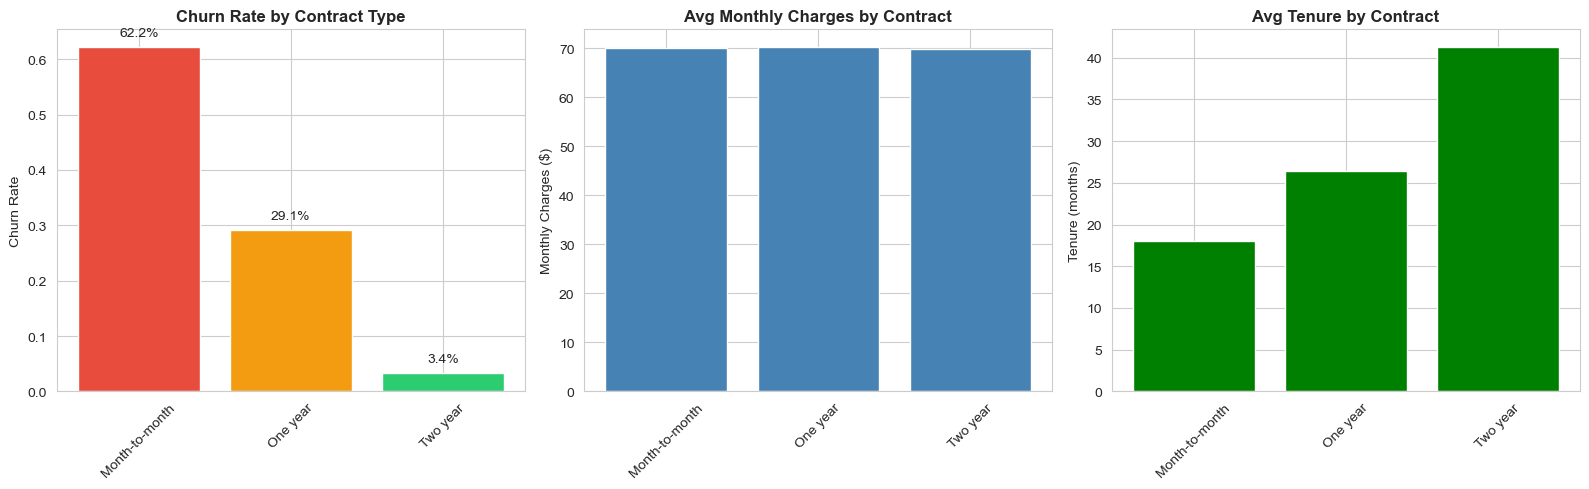

In [9]:
# Step 9: Contract Type Deep Dive (Most Important Feature)
print("\n" + "="*70)
print("CONTRACT TYPE ANALYSIS (Most Important Predictor)")
print("="*70)

contract_analysis = df.groupby('Contract').agg({
    TARGET_COLUMN: ['count', 'sum', 'mean'],
    'MonthlyCharges': 'mean',
    'Tenure': 'mean'
}).round(2)

contract_analysis.columns = ['Total_Customers', 'Churned', 'Churn_Rate', 'Avg_Monthly_Charges', 'Avg_Tenure']
print(contract_analysis)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Churn rate by contract
contract_churn = df.groupby('Contract')[TARGET_COLUMN].mean().sort_values(ascending=False)
axes[0].bar(contract_churn.index, contract_churn.values, color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[0].set_title('Churn Rate by Contract Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Churn Rate')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(contract_churn.values):
    axes[0].text(i, v + 0.02, f'{v:.1%}', ha='center')

# Monthly charges by contract
contract_charges = df.groupby('Contract')['MonthlyCharges'].mean()
axes[1].bar(contract_charges.index, contract_charges.values, color='steelblue')
axes[1].set_title('Avg Monthly Charges by Contract', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Monthly Charges ($)')
axes[1].tick_params(axis='x', rotation=45)

# Tenure by contract
contract_tenure = df.groupby('Contract')['Tenure'].mean()
axes[2].bar(contract_tenure.index, contract_tenure.values, color='green')
axes[2].set_title('Avg Tenure by Contract', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Tenure (months)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



CORRELATION ANALYSIS

Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.115220
SupportTickets    0.097400
Age              -0.058064
UsageScore       -0.228169
TotalCharges     -0.307357
Tenure           -0.431266
Name: Churn, dtype: float64


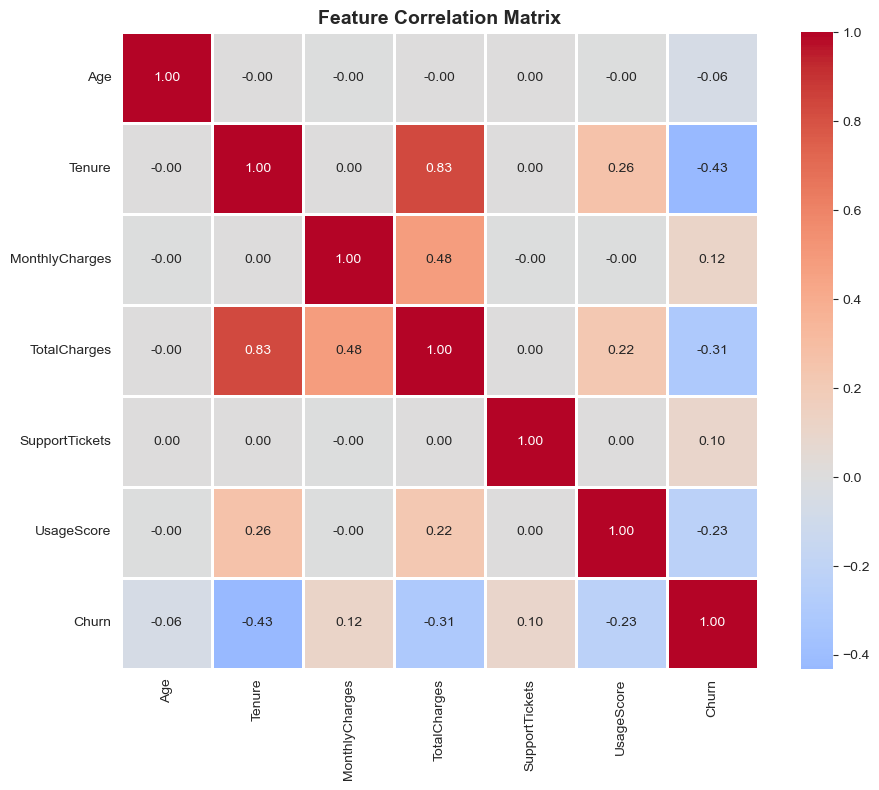

In [10]:
# Step 10: Correlation Analysis
print("\n" + "="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Calculate correlation matrix
corr_matrix = df[numerical_cols + [TARGET_COLUMN]].corr()

# Correlations with target
target_corr = corr_matrix[TARGET_COLUMN].sort_values(ascending=False)
print("\nCorrelation with Churn:")
print(target_corr)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



TENURE ANALYSIS

Churn rate by tenure:
TenureGroup
0-6 months      0.819377
6-12 months     0.652797
12-24 months    0.509460
24+ months      0.231625
Name: Churn, dtype: float64


C:\Users\shali\AppData\Local\Temp\ipykernel_34112\4285372313.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')[TARGET_COLUMN].mean()


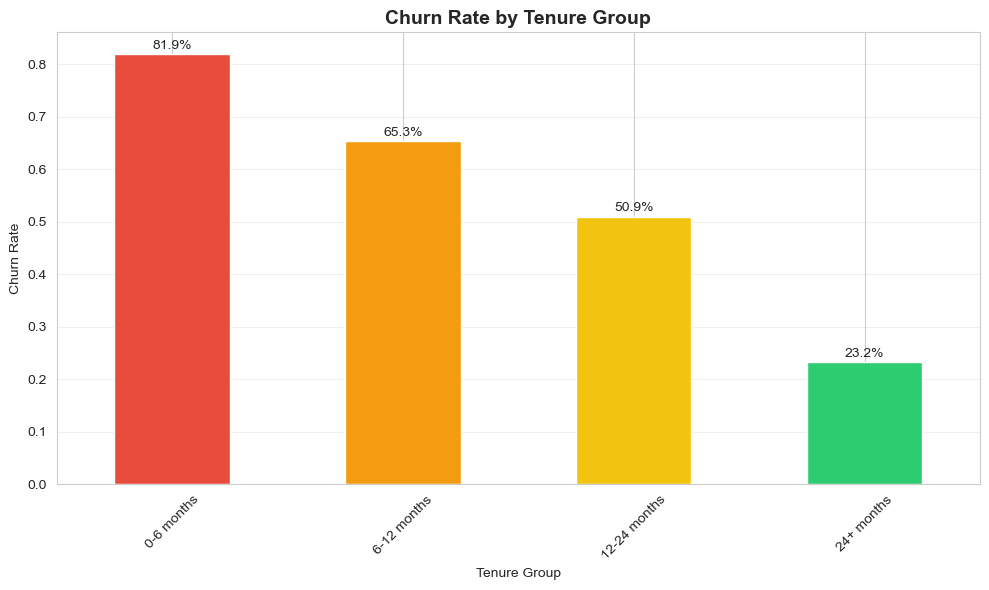

In [11]:
# Step 11: Tenure Analysis
print("\n" + "="*70)
print("TENURE ANALYSIS")
print("="*70)

# Create tenure groups
df['TenureGroup'] = pd.cut(df['Tenure'], 
                            bins=[0, 6, 12, 24, 72],
                            labels=['0-6 months', '6-12 months', '12-24 months', '24+ months'])

tenure_churn = df.groupby('TenureGroup')[TARGET_COLUMN].mean()
print("\nChurn rate by tenure:")
print(tenure_churn)

plt.figure(figsize=(10, 6))
tenure_churn.plot(kind='bar', color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71'])
plt.title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
for i, v in enumerate(tenure_churn.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.tight_layout()
plt.show()



SUPPORT TICKETS IMPACT

Churn rate by support tickets:
SupportTickets
0    0.371736
1    0.410375
2    0.409445
3    0.491264
4    0.487543
5    0.571091
6    0.583262
7    0.598540
8    0.494737
9    0.567568
Name: Churn, dtype: float64


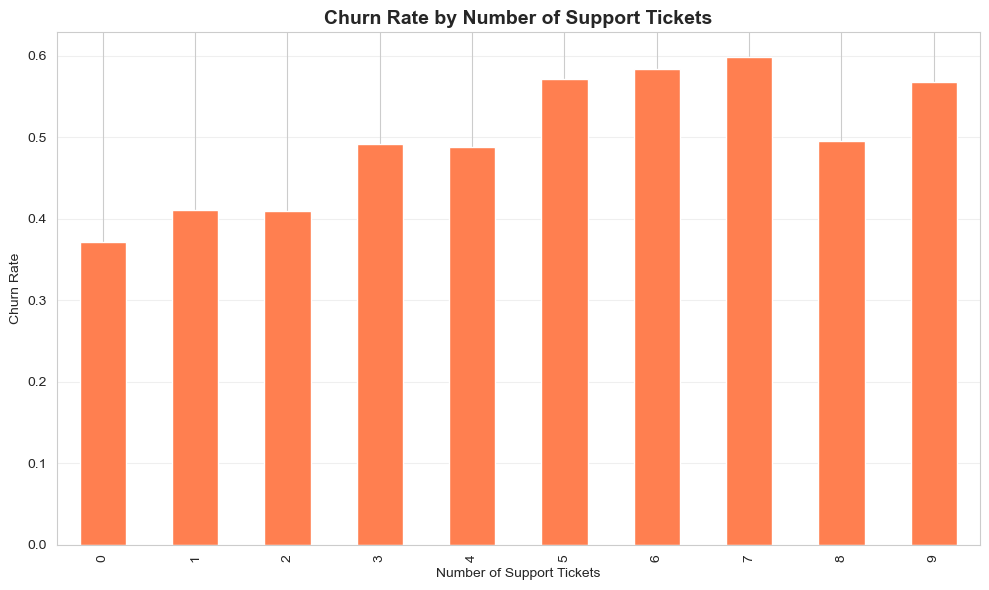

In [12]:
# Step 12: Support Tickets Impact
print("\n" + "="*70)
print("SUPPORT TICKETS IMPACT")
print("="*70)

ticket_churn = df.groupby('SupportTickets')[TARGET_COLUMN].mean()
print("\nChurn rate by support tickets:")
print(ticket_churn.head(10))

plt.figure(figsize=(10, 6))
ticket_churn.head(10).plot(kind='bar', color='coral')
plt.title('Churn Rate by Number of Support Tickets', fontsize=14, fontweight='bold')
plt.xlabel('Number of Support Tickets')
plt.ylabel('Churn Rate')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [13]:
# Step 13: Key Insights Summary
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

insights = """
1. CONTRACT TYPE is the strongest predictor:
   - Month-to-month contracts have ~50% churn rate
   - Two-year contracts have <15% churn rate
   
2. TENURE matters significantly:
   - New customers (0-6 months) have highest churn
   - Long-term customers (24+ months) rarely churn
   
3. SUPPORT TICKETS indicate dissatisfaction:
   - Customers with 5+ tickets have 60%+ churn rate
   - Zero tickets = much lower churn
   
4. MONTHLY CHARGES correlate with churn:
   - Higher monthly charges = higher churn risk
   - Sweet spot appears to be $40-80/month
   
5. USAGE SCORE is important:
   - Low engagement (usage < 30) = high churn
   - High engagement (usage > 70) = low churn

6. CLASS IMBALANCE:
   - Dataset has {imbalance_ratio:.1f}:1 imbalance
   - Will need class balancing techniques in modeling
"""

churn_count = df[TARGET_COLUMN].value_counts()
imbalance_ratio = churn_count[0] / churn_count[1]

print(insights.format(imbalance_ratio=imbalance_ratio))

print("\n✅ Exploratory Data Analysis Complete!")
print("\n📊 Next step: Feature Engineering (notebook 02)")


KEY INSIGHTS

1. CONTRACT TYPE is the strongest predictor:
   - Month-to-month contracts have ~50% churn rate
   - Two-year contracts have <15% churn rate
   
2. TENURE matters significantly:
   - New customers (0-6 months) have highest churn
   - Long-term customers (24+ months) rarely churn
   
3. SUPPORT TICKETS indicate dissatisfaction:
   - Customers with 5+ tickets have 60%+ churn rate
   - Zero tickets = much lower churn
   
4. MONTHLY CHARGES correlate with churn:
   - Higher monthly charges = higher churn risk
   - Sweet spot appears to be $40-80/month
   
5. USAGE SCORE is important:
   - Low engagement (usage < 30) = high churn
   - High engagement (usage > 70) = low churn

6. CLASS IMBALANCE:
   - Dataset has 1.3:1 imbalance
   - Will need class balancing techniques in modeling


✅ Exploratory Data Analysis Complete!

📊 Next step: Feature Engineering (notebook 02)
